In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def intialise_parameters(lenw):
    w = np.random.randn(1,lenw)
    #w = np.zeros((1, lenw))
    b = 0
    return w,b

In [3]:
def forward_prop(X,w,b):
    z = np.dot(w,X) + b
    return z

In [4]:
def cost_function(z,y,reg_penalty='',penalty_factor=0):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y),dtype=np.float64)
    penalty=0
    
    if reg_penalty=='L1':
        penalty = penalty_factor * np.sum(np.abs(w))
    elif reg_penalty=='L2':
        penalty =(penalty_factor / (2 * m))  * np.sum(np.square(w))
    
    return J+penalty

In [5]:
def back_prop(X,y,z,reg_penalty="",penalty_factor=0):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(dz,X.T)
    if reg_penalty=="L1":
        l1_gradient = penalty_factor * np.sign(w)
        dw += l1_gradient
    elif reg_penalty=="L2":
        l2_gradient = (penalty_factor / m) * w
        dw += l2_gradient
    
    db = np.sum(dz)
    return dw,db

In [6]:
def gradient_descent_update(w,b,dw,db,learning_rate=0.01):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [7]:
def linear_regresssion_model(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=50,stop_loss=0.01,metric='RMSE',reg_penalty="",penalty_factor=0):
    X_train=X_train.T
    X_val=X_val.T
    y_train_arr = np.array([y_train])
    y_val_arr=np.array([y_val])
    
    lenw = X_train.shape[0]
    w,b = intialise_parameters(lenw)
    
    costs_train = []
    m_train = y_train_arr.shape[1]
    m_val = y_val_arr.shape[1]
    errors=[]
    error=0
    
    for i in range(1,epochs+1):
        z_train = forward_prop(X_train,w,b)
        cost_train = cost_function(z_train,y_train_arr,reg_penalty,penalty_factor)
        dw, db = back_prop(X_train,y_train_arr,z_train,reg_penalty,penalty_factor)
        w,b = gradient_descent_update(w,b,dw,db,learning_rate)
        costs_train.append(cost_train)
        if cost_train<stop_loss:
            break
        
        z_val = forward_prop(X_val,w,b)    
        
        if metric=="MAE":
            error = (1/m_val)*np.sum(np.abs(z_val - y_val_arr),dtype=np.float64)
        elif metric=="MSE":
            error = (1/m_val)*np.sum(np.square(z_val - y_val_arr),dtype=np.float64)
        elif metric == "RMSE":
            error = np.sqrt((1/m_val) * np.sum(np.square(z_val - y_val_arr),dtype=np.float64),dtype=np.float64) 
        errors.append(error)
    
    return z_val,y_val_arr,w,b,errors
        

In [8]:
dataset=pd.read_csv('cleaned.csv')
print(dataset.shape)

(2681, 20)


In [9]:
dataset.head()

,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,BOD_avg,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
0,17.0,33.0,5.4,9.2,7.4,8.3,230.0,495.0,0.3,0.77,11000.0,160000.0,28000.0,160000.0,2.15,1,0,0,0,0
1,14.0,29.0,5.2,9.0,7.4,8.2,191.0,520.0,0.3,1.65,2300.0,160000.0,3300.0,160000.0,2.20,1,0,0,0,0
2,10.0,28.0,6.5,10.4,7.2,8.4,191.0,495.0,0.3,0.57,780.0,160000.0,1100.0,160000.0,2.40,1,0,0,0,0
3,14.0,30.0,6.2,10.4,7.1,8.1,190.0,516.0,0.3,1.20,1300.0,35000.0,1700.0,92000.0,1.65,1,0,0,0,0
4,17.0,29.0,2.5,8.9,7.1,7.9,164.0,632.0,0.3,0.49,2700.0,350000.0,2700.0,540000.0,2.70,1,0,0,0,0


In [10]:
means = dataset.mean()
std_devs = dataset.std()

dataset = (dataset - means)

dataset /= std_devs


In [11]:
y=dataset['BOD_avg']
y.describe()

count    2.681000e+03
mean     1.060064e-15
std      1.000000e+00
min     -4.003822e-01
25%     -3.523655e-01
50%     -2.895744e-01
75%     -7.903960e-02
max      1.411544e+01
Name: BOD_avg, dtype: float64

In [12]:
X=dataset.drop(columns=['BOD_avg'])
X.describe()

,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
count,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2.681000e+03
mean,3.960713e-15,-1.557045e-15,2.172236e-14,9.568209e-15,-2.522674e-16,1.772280e-14,5.880331e-18,-1.210644e-16,2.836059e-15,-9.844171e-16,5.017123e-16,-2.914025e-17,-6.367684e-17,-4.670877e-17,2.430829e-14,-1.229884e-14,-4.859472e-15,-2.197422e-15,-5.685452e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.840610e+00,-6.494893e+00,-1.889960e+00,-2.978116e+00,-8.878541e+00,-1.033208e+01,-3.289653e-01,-3.052745e-01,-5.727403e-01,-4.410232e-01,-1.649546e-01,-4.886168e-02,-4.753050e-02,-6.155075e-02,-1.066552e+00,-6.329155e-01,-3.018842e-01,-1.291488e-01,-2.981927e-01
25%,-5.794836e-01,-7.349875e-01,-5.289410e-01,-4.174708e-01,-5.077523e-01,-4.991644e-01,-2.303723e-01,-2.473229e-01,-3.950872e-01,-3.572099e-01,-1.646069e-01,-4.886104e-02,-4.731342e-02,-6.154991e-02,-1.066552e+00,-6.329155e-01,-3.018842e-01,-1.291488e-01,-2.981927e-01
50%,6.169978e-15,4.835961e-02,1.941001e-01,5.198074e-02,1.542193e-02,9.081051e-02,-1.541271e-01,-1.929004e-01,-3.583314e-01,-2.380088e-01,-1.592167e-01,-4.885346e-02,-4.629207e-02,-6.154513e-02,9.372507e-01,-6.329155e-01,-3.018842e-01,-1.291488e-01,-2.981927e-01
75%,7.712788e-01,6.243501e-01,7.470139e-01,4.787549e-01,5.385962e-01,6.807854e-01,-7.472484e-17,-6.288066e-02,2.380417e-15,-9.098366e-16,-9.731637e-02,-4.860931e-02,-3.792911e-02,-6.122726e-02,9.372507e-01,1.579401e+00,-3.018842e-01,-1.291488e-01,-2.981927e-01
max,2.700939e+00,4.080293e+00,2.490819e+00,8.843528e+00,2.805685e+00,4.417293e+00,2.010936e+01,1.072690e+01,1.435012e+01,3.270994e+01,2.678586e+01,3.865284e+01,4.977434e+01,3.228833e+01,9.372507e-01,1.579401e+00,3.311293e+00,7.740120e+00,3.352285e+00


In [13]:
X.head()

,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
0,-0.579484,1.085143,0.279164,0.820174,0.538596,0.484127,-0.181076,-0.214261,-0.395087,-0.371179,0.791197,-0.046169,0.052106,-0.060988,0.937251,-0.632915,-0.301884,-0.129149,-0.298193
1,-1.158382,0.163558,0.194100,0.734819,0.538596,0.287469,-0.206710,-0.209617,-0.395087,-0.289228,0.034830,-0.046169,-0.035794,-0.060988,0.937251,-0.632915,-0.301884,-0.129149,-0.298193
2,-1.930246,-0.066838,0.747014,1.332303,0.189813,0.680785,-0.206710,-0.214261,-0.395087,-0.389804,-0.097316,-0.046169,-0.043623,-0.060988,0.937251,-0.632915,-0.301884,-0.129149,-0.298193
3,-1.158382,0.393954,0.619418,1.332303,0.015422,0.090811,-0.207367,-0.210360,-0.395087,-0.331135,-0.052108,-0.048273,-0.041488,-0.061227,0.937251,-0.632915,-0.301884,-0.129149,-0.298193
4,-0.579484,0.163558,-0.954259,0.692142,0.015422,-0.302506,-0.224457,-0.188814,-0.395087,-0.397254,0.069606,-0.042972,-0.037929,-0.059652,0.937251,-0.632915,-0.301884,-0.129149,-0.298193


In [14]:
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    # Set seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Determine split index
    split_index = int((1 - test_size) * num_samples)
    
    # Split data
    X_train, X_test = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
    y_train, y_test = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]
    
    return X_train, X_test, y_train, y_test

In [15]:
 X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.2, random_state=5)


In [16]:
z_val,y_val_arr,w,b,errors_n=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.01,epochs=500)

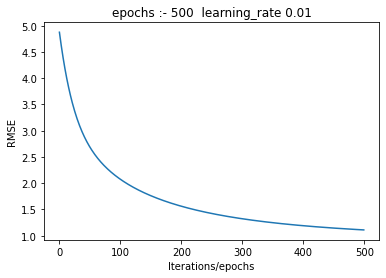

In [17]:
plt.plot(errors_n)
plt.xlabel('Iterations/epochs')
plt.ylabel('RMSE')

plt.title('epochs :- 500  learning_rate 0.01' )
plt.show()

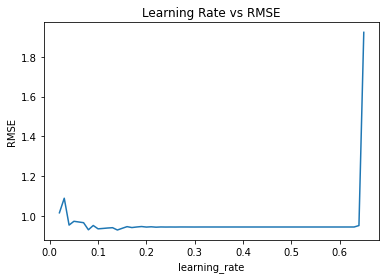

In [18]:
# z_val,y_val,w,b,errors=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.01,epochs=50)
# epchs 50 
# learning rate 0.02 - 1
final_error = []
learningRates=[]
for i in range(2, 66):
    learningRate = (i)/100
    z_val,y_val_arr,w,b,errors=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate = learningRate,epochs=100)
    final_error.append(errors[-1])
    learningRates.append(learningRate)
    
plt.plot(learningRates,final_error)  
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.title('Learning Rate vs RMSE')
plt.show()

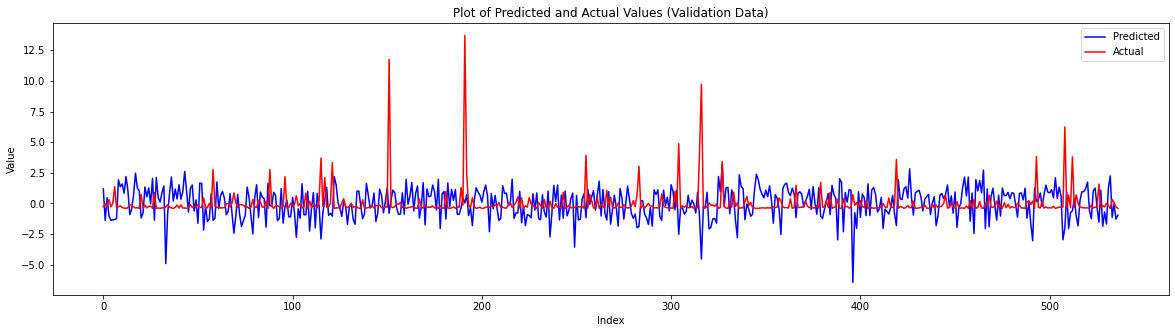

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(z_val[0], label='Predicted', color='blue')
plt.plot(y_val_arr[0], label='Actual', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Predicted and Actual Values (Validation Data)')
plt.legend()
plt.show()

In [20]:
len(y_val)

537

In [21]:
from sklearn import linear_model

In [22]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train,y_train)
prediction = linear_regression.predict(X_val)


In [23]:
prediction.shape

(537,)

In [24]:
MAE_val_with_sklearn = (1/len(y_val))*np.sum(np.abs(prediction-y_val.T))

In [25]:
MAE_val_with_sklearn

0.3935510480308669

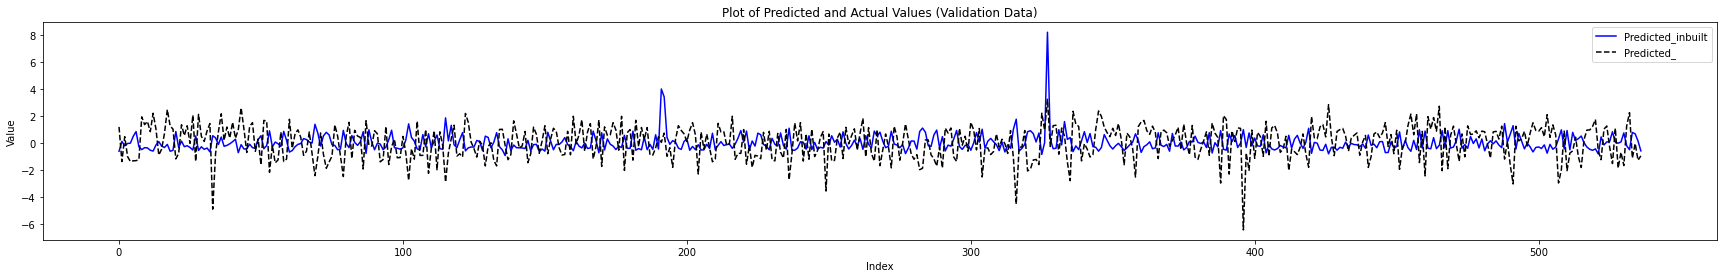

In [26]:
plt.figure(figsize=(30, 4))
plt.plot(prediction, label='Predicted_inbuilt', color='blue')
plt.plot(z_val[0], label='Predicted_', color='black',linestyle='--')
# plt.plot(y_val_arr[0], label='Actual', color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Predicted and Actual Values (Validation Data)')
plt.legend()
plt.show()

In [27]:
z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.01,epochs=400,reg_penalty="L1",penalty_factor=0.4)
z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.01,epochs=400,reg_penalty="L2",penalty_factor=0.4)
z_val,y_val_arr,w,b,errors_n=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.01,epochs=400)

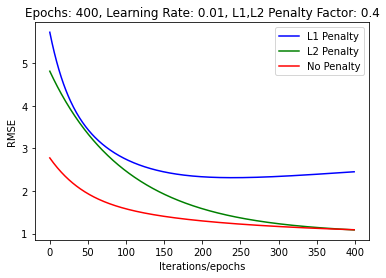

In [28]:
plt.plot(errors_l1, label='L1 Penalty', color='blue')
plt.plot(errors_l2, label='L2 Penalty', color='green')
plt.plot(errors_n, label='No Penalty', color='red')

plt.xlabel('Iterations/epochs')
plt.title('Epochs: 400, Learning Rate: 0.01, L1,L2 Penalty Factor: 0.4')
plt.ylabel('RMSE')

plt.legend()
plt.show()

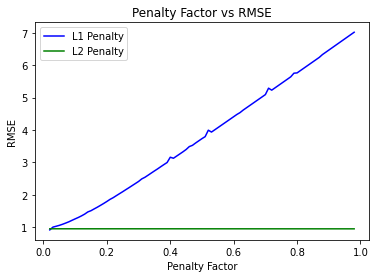

In [29]:
error_reg_l1 = []
error_reg_l2 = []
penalty_list=[]
for i in range(2, 99):
    penalty = (i)/100
    z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.5,epochs=100,reg_penalty="L1",penalty_factor=penalty)
    z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.5,epochs=100,reg_penalty="L2",penalty_factor=penalty)
    error_reg_l1.append(errors_l1[-1])
    error_reg_l2.append(errors_l2[-1])
    penalty_list.append(penalty)
plt.plot(penalty_list,error_reg_l1,label='L1 Penalty', color='blue')
plt.plot(penalty_list,error_reg_l2,label='L2 Penalty', color='green')
plt.title('Penalty Factor vs RMSE')
plt.xlabel('Penalty Factor')
plt.ylabel('RMSE')

plt.legend()
plt.show()


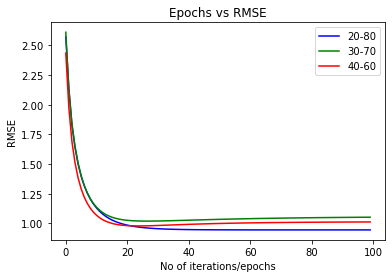

In [30]:
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.2, random_state=5)
z_val,y_val_arr,w,b,errors_80=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.3, random_state=5)
z_val,y_val_arr,w,b,errors_70=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_60=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
plt.plot(errors_80, label='20-80', color='blue')
plt.plot(errors_70, label='30-70', color='green')
plt.plot(errors_60, label='40-60', color='red')
plt.ylabel('RMSE')
plt.xlabel('No of iterations/epochs')
plt.title('Epochs vs RMSE')
plt.legend()
plt.show()

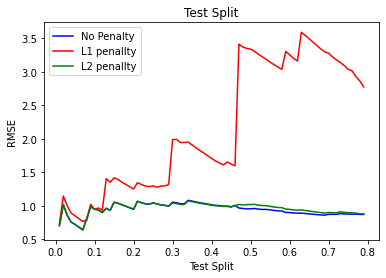

In [31]:
error_split = []
error_split_l1=[]
error_split_l2=[]
split_list=[]
for i in range(1, 80):
    split= (i)/100
    X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=split, random_state=5)
    z_val,y_val_arr,w,b,errors_norm=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
    z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100,reg_penalty="L1",penalty_factor=0.1)
    z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100,reg_penalty="L2",penalty_factor=0.1)
    error_split.append(errors_norm[-1])
    error_split_l1.append(errors_l1[-1])
    error_split_l2.append(errors_l2[-1])
    split_list.append(split)
plt.plot(split_list,error_split,label='No Penalty', color='blue')
plt.plot(split_list,error_split_l1,label='L1 penallty',color='red')
plt.plot(split_list,error_split_l2,label='L2 penallty',color='green')
plt.xlabel('Test Split')
plt.ylabel('RMSE')
plt.title('Test Split')
plt.legend()
plt.show()
